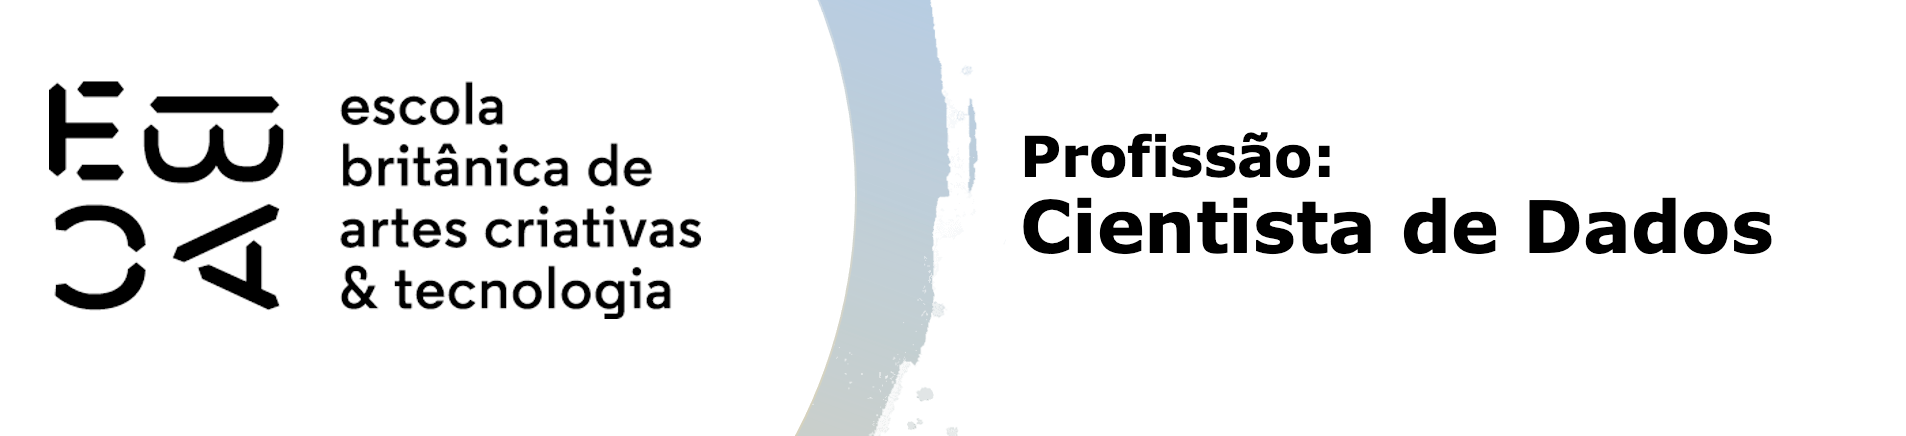

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [30]:
df = pd.read_pickle('base_nfp.pkl')
df = df[df['Data Emissão'] >= '2020-01-01']
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


In [83]:
df = df[df['Valor NF'] > 0]
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,categoria,dia_semana,fim_semana,dia_mes,mes,trimestre,Categoria_5,Categoria_10,Categoria_20,Categoria_50
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.800003,2020-08-01,0.0,A Calcular,2019,2,...,não definido,Wednesday,0,1,1,1,3,6,12,28
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.709999,2020-01-01,0.0,A Calcular,2019,2,...,Mercado,Wednesday,0,1,1,1,1,2,4,10
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.900002,2020-08-01,0.0,A Calcular,2019,2,...,Alimentos,Wednesday,0,1,1,1,2,4,7,16
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.770000,2020-08-01,0.0,A Calcular,2019,2,...,Farmácia,Wednesday,0,1,1,1,1,2,4,9
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.949997,2020-08-01,0.0,A Calcular,2019,2,...,Restaurantes,Wednesday,0,1,1,1,3,6,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.839996,2021-01-07,0.0,Liberado,2021,2,...,não definido,Thursday,0,7,1,1,5,9,18,43
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.649994,2021-01-07,0.0,Liberado,2021,2,...,Mercado,Thursday,0,7,1,1,5,10,19,46
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.710007,2021-01-07,0.0,Liberado,2021,2,...,Farmácia,Thursday,0,7,1,1,4,8,15,36
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.160000,2021-01-07,0.0,Liberado,2021,2,...,Mercado,Thursday,0,7,1,1,2,4,8,19


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86000 entries, 64598 to 187645
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CNPJ emit.           86000 non-null  object        
 1   Emitente             86000 non-null  object        
 2   No.                  86000 non-null  int32         
 3   Data Emissão         86000 non-null  datetime64[ns]
 4   Valor NF             86000 non-null  float32       
 5   Data Registro        86000 non-null  datetime64[ns]
 6   Créditos             86000 non-null  float32       
 7   Situação do Crédito  86000 non-null  category      
 8   Ano                  86000 non-null  int32         
 9   Semestre             86000 non-null  int32         
 10  Retorno              86000 non-null  float32       
 11  flag_credito         86000 non-null  int32         
 12  categoria            86000 non-null  object        
 13  dia_semana           86000 non-

In [87]:
df['Retorno'] = df['Retorno'].fillna(df['Retorno'].mean())
df.isnull().sum()

CNPJ emit.             0
Emitente               0
No.                    0
Data Emissão           0
Valor NF               0
Data Registro          0
Créditos               0
Situação do Crédito    0
Ano                    0
Semestre               0
Retorno                0
flag_credito           0
categoria              0
dia_semana             0
fim_semana             0
dia_mes                0
mes                    0
trimestre              0
Categoria_5            0
Categoria_10           0
Categoria_20           0
Categoria_50           0
dtype: int64

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [90]:
df['dia_semana'] = df['Data Emissão'].dt.day_name()
df['fim_semana'] = df['Data Emissão'].dt.weekday.isin([5, 6]).astype(int)
df['dia_mes'] = df['Data Emissão'].dt.day
df['mes'] = df['Data Emissão'].dt.month
df['trimestre'] = df['Data Emissão'].dt.quarter

df['Categoria_5'] = pd.qcut(df['Valor NF'], 5, labels=False) + 1
df['Categoria_10'] = pd.qcut(df['Valor NF'], 10, labels=False) + 1
df['Categoria_20'] = pd.qcut(df['Valor NF'], 20, labels=False) + 1
df['Categoria_50'] = pd.qcut(df['Valor NF'], 50, labels=False) + 1

df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,categoria,dia_semana,fim_semana,dia_mes,mes,trimestre,Categoria_5,Categoria_10,Categoria_20,Categoria_50
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.800003,2020-08-01,0.0,A Calcular,2019,2,...,não definido,Wednesday,0,1,1,1,3,6,11,28
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.709999,2020-01-01,0.0,A Calcular,2019,2,...,Mercado,Wednesday,0,1,1,1,1,2,4,9
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.900002,2020-08-01,0.0,A Calcular,2019,2,...,Alimentos,Wednesday,0,1,1,1,2,3,6,15
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.770000,2020-08-01,0.0,A Calcular,2019,2,...,Farmácia,Wednesday,0,1,1,1,1,2,4,9
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.949997,2020-08-01,0.0,A Calcular,2019,2,...,Restaurantes,Wednesday,0,1,1,1,3,6,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.839996,2021-01-07,0.0,Liberado,2021,2,...,não definido,Thursday,0,7,1,1,5,9,18,43
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.649994,2021-01-07,0.0,Liberado,2021,2,...,Mercado,Thursday,0,7,1,1,5,10,19,46
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.710007,2021-01-07,0.0,Liberado,2021,2,...,Farmácia,Thursday,0,7,1,1,4,8,15,36
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.160000,2021-01-07,0.0,Liberado,2021,2,...,Mercado,Thursday,0,7,1,1,2,4,8,18


In [92]:
var = ['No.', 'Ano', 'Semestre', 'flag_credito', 'Categoria_5', 'Categoria_10', 'Categoria_20', 'Categoria_50']
float = ['Valor NF', 'Créditos', 'Retorno',]

def convert_int(var):
    for c in var:
        df[var] = df[var].astype('int32')
    return None

def convert_float(var):
    for c in var:
        df[var] = df[var].astype('float32')
    return None

convert_int(var)
convert_float(float)

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [95]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados = metadados.drop(index=['CNPJ emit.', 'Emitente', 'categoria', 'dia_semana'], axis=0)
metadados

,dtypes
No.,int32
Data Emissão,datetime64[ns]
Valor NF,float32
Data Registro,datetime64[ns]
Créditos,float32
Situação do Crédito,category
Ano,int32
Semestre,int32
Retorno,float32
flag_credito,int32


In [97]:
metadados['papel'] = 'covariavel'
metadados.loc['Retorno','papel'] = 'resposta'
metadados['nunique'] = df.nunique()
metadados

,dtypes,papel,nunique
No.,int32,covariavel,70738
Data Emissão,datetime64[ns],covariavel,731
Valor NF,float32,covariavel,28380
Data Registro,datetime64[ns],covariavel,734
Créditos,float32,covariavel,7845
Situação do Crédito,category,covariavel,3
Ano,int32,covariavel,3
Semestre,int32,covariavel,2
Retorno,float32,resposta,35587
flag_credito,int32,covariavel,2


In [99]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rotulo_evento]/tab.loc['total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento]/tab.loc['total', rotulo_nao_evento]
    epsilon = 1e-10  # Valor muito pequeno para evitar zero
    tab['pct_evento'] = tab['pct_evento'].replace(0, epsilon)
    tab['pct_nao_evento'] = tab['pct_nao_evento'].replace(0, epsilon)
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

iv = IV(df.Créditos, df.Retorno)
iv

46.051701855275745

In [100]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'nunique']>5):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.Retorno)
    else: 
        metadados.loc[var, 'IV'] = IV(df[var], df.Retorno)
    
metadados

,dtypes,papel,nunique,IV
No.,int32,covariavel,70738,18.118790
Data Emissão,datetime64[ns],covariavel,731,18.133681
Valor NF,float32,covariavel,28380,17.492403
Data Registro,datetime64[ns],covariavel,734,18.097943
Créditos,float32,covariavel,7845,0.000000
Situação do Crédito,category,covariavel,3,1.119989
Ano,int32,covariavel,3,11.648691
Semestre,int32,covariavel,2,10.733329
Retorno,float32,resposta,35587,NaN
flag_credito,int32,covariavel,2,46.051702


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

Segundo o IV as variaveis que apresentam o maior poder de discriminação são Crédito e flag_credito  

Sim, qunado categorizamos variaveis continuas, o numero de categorias pode impactar o valor do IV.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

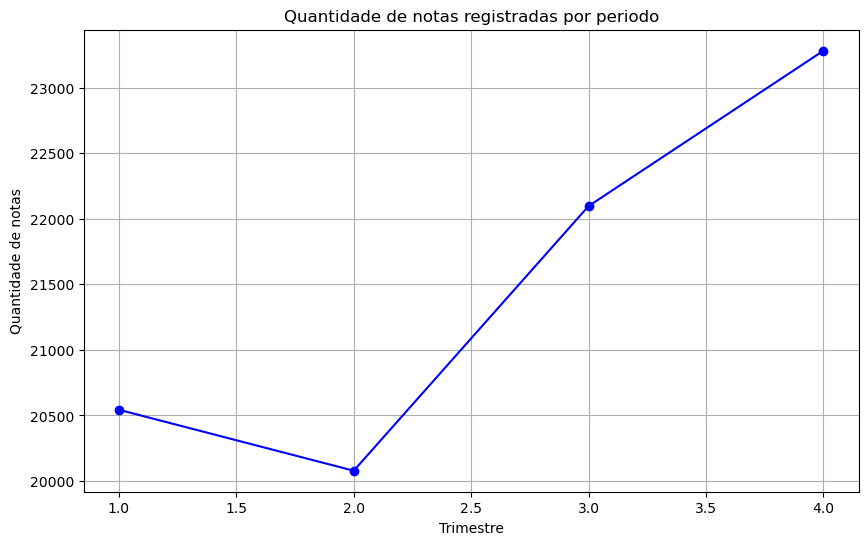

In [102]:
qtd_periodo = df.groupby('trimestre').size()

plt.figure(figsize=(10, 6))
qtd_periodo.plot(kind='line', marker='o', color='b')
plt.title('Quantidade de notas registradas por periodo')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de notas')
plt.grid(True)
plt.show()

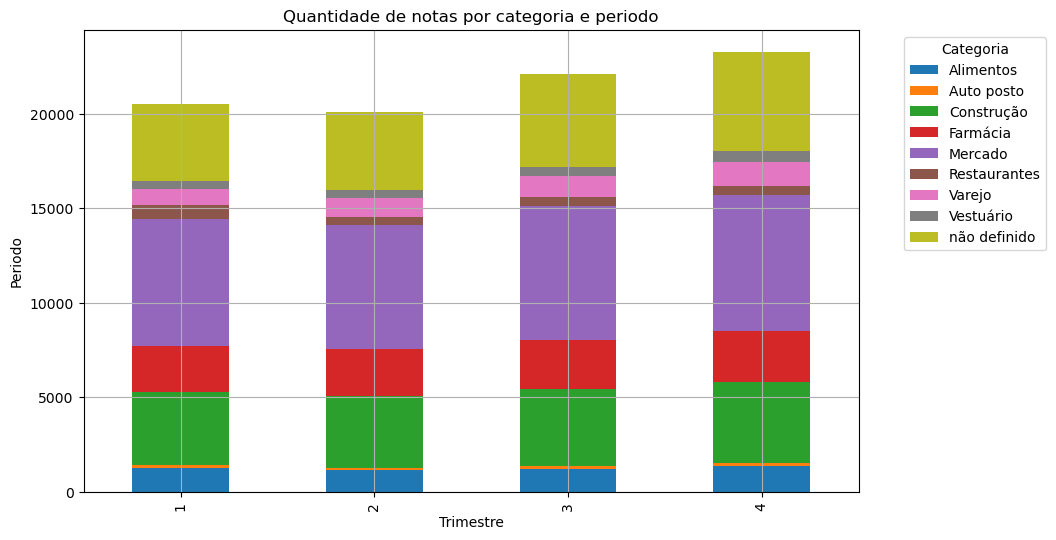

In [105]:
qtd_categoria = df.groupby(['trimestre', 'categoria']).size().unstack().fillna(0)

qtd_categoria.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quantidade de notas por categoria e periodo')
plt.xlabel('Trimestre')
plt.ylabel('Periodo')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

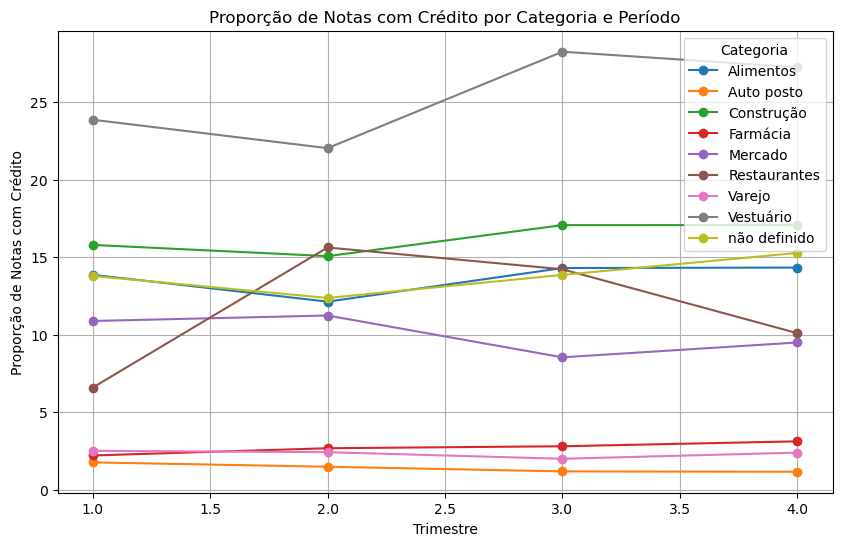

In [107]:
prop_credito = df.groupby(['trimestre', 'categoria'])['Créditos'].mean().unstack().fillna(0)

prop_credito.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Proporção de Notas com Crédito por Categoria e Período')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.grid(True)
plt.legend(title='Categoria', loc='upper right')
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

WOE por trimestre e categoria:
Créditos                     WOE
trimestre categoria             
1         Alimentos         -inf
          Auto posto        -inf
          Construção   -6.234901
          Farmácia     -7.492203
          Mercado      -6.538429
          Restaurantes -5.099866
          Varejo       -6.502790
          Vestuário         -inf
          não definido      -inf
2         Alimentos    -5.372961
          Auto posto        -inf
          Construção   -7.661527
          Farmácia     -6.324956
          Mercado      -6.536692
          Restaurantes      -inf
          Varejo            -inf
          Vestuário         -inf
          não definido      -inf
3         Alimentos    -5.241747
          Auto posto   -4.553877
          Construção   -7.637716
          Farmácia     -6.007584
          Mercado      -8.222016
          Restaurantes      -inf
          Varejo            -inf
          Vestuário         -inf
          não definido -7.346333
4         Al

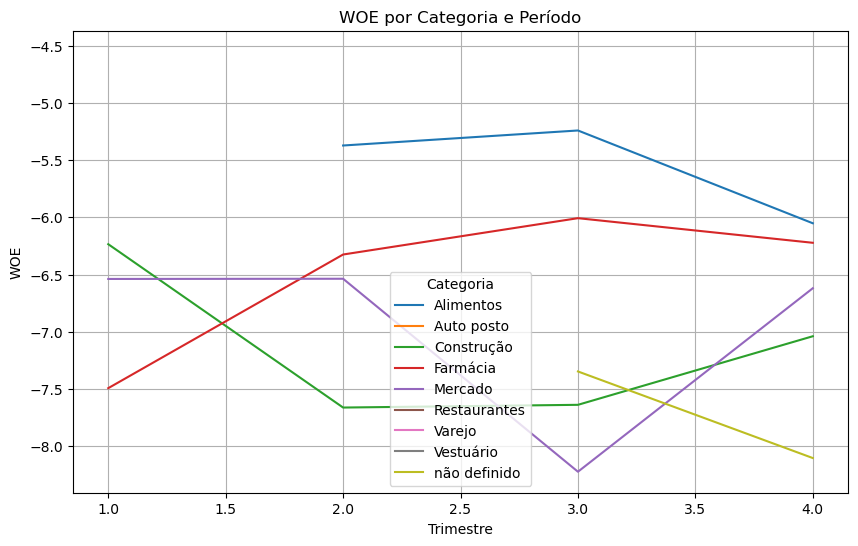

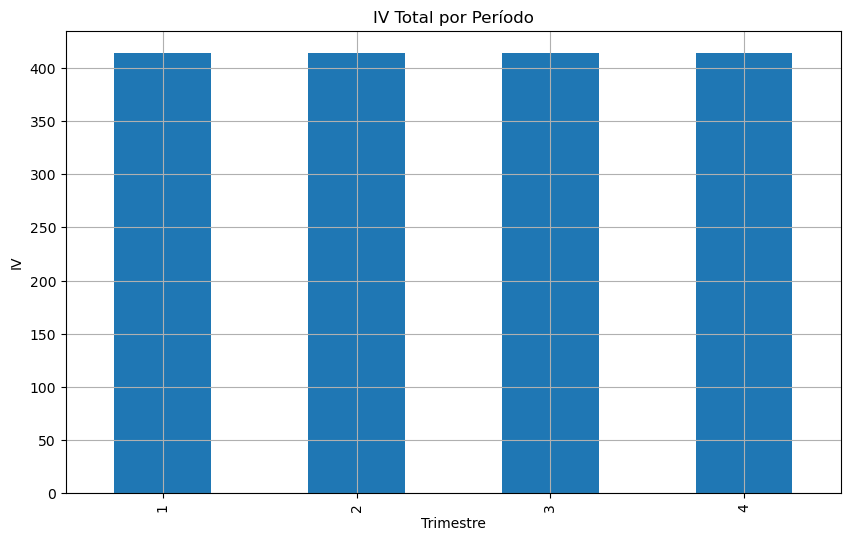

In [110]:
df['Créditos'] = df['Créditos'].fillna(0)

tab = df.groupby(['trimestre', 'categoria', 'Créditos']).size().unstack(fill_value=0)

tab['bons'] = tab[1]
tab['maus'] = tab[0]

tab['total'] = tab['bons'] + tab['maus']
tab['proporcao_bons'] = tab['bons'] / tab['total']
tab['proporcao_maus'] = tab['maus'] / tab['total']

tab['WOE'] = np.log(tab['proporcao_bons'] / tab['proporcao_maus'])

tab['IV'] = IV(tab['proporcao_bons'], tab['proporcao_maus'])

iv_total = tab.groupby('trimestre')['IV'].sum()

print("WOE por trimestre e categoria:")
print(tab[['WOE']])

print("\nIV total por trimestre:")
print(iv_total)

tab.pivot_table(index='trimestre', columns='categoria', values='WOE').plot(kind='line', figsize=(10, 6))
plt.title('WOE por Categoria e Período')
plt.xlabel('Trimestre')
plt.ylabel('WOE')
plt.legend(title='Categoria')
plt.grid(True)
plt.show()

iv_total.plot(kind='bar', figsize=(10, 6))
plt.title('IV Total por Período')
plt.xlabel('Trimestre')
plt.ylabel('IV')
plt.grid(True)
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

Percebemos com facilidade que a categoria 'Mercado', tem a maior proporção de notas com retorno maior que 0. E sim as diferenças são estaveis no tempo. Conseguimos perceber isso no gráfico de quantidade de notas por categoria e periodo.